# Precipitation exercises
***

## <font color=steelblue>Exercise 4 - Areal precipitation: hypsometric method
    
<font color=steelblue>Compute the mean annual areal precipitation in the Pas river catchment (Cantabria), given its digital elevation model (*dem_pas.csv*), and the daily precipitation records for the stations within the catchment (*daily_rainfall_pas.csv*) together with their location (*stations_pas.csv*).<tfont>

In [39]:
import numpy as np

import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns
sns.set()
sns.set_context('notebook')

### Hypsometric curve<br>

The hypsometric curve defines the percentage of the area of a catchment that lies below a given altitude. In this exercise, we'll use the hypsometric curve to calculate the proportion of the catchment area at different altitude bands.

The data required to draw the hypsometric curve is the topography of the catchment. In our case, we have the digital elevation model (DEM) of the catchment. The DEM is an ASCII format (open *dem_pas.csv* with a text processor), which is a plain text. The first 6 rows of the text file define the attributes of the map (number of columns, number of rows, coordinate X of the lower left corner, coordinate Y of the lower left corner, size of the cells in the map, and the code given to cells with no value). The following rows are the map itself; they contain the data for a rectangular matrix representing the map.

#### Import DEM
To import the DEM we are using a function called `read_ascii` which is incluede in the notebook *functions_precipitation.ipynb* given along with the exercises. To import functions form another notebook, we must use the Python magig function `%run`.

In [40]:
# import function to read ASCII maps
%run functions_precipitation.ipynb

In [41]:
# import the DEM
dem, attributes = read_ascii('../data/dem_pas.asc')

In [42]:
# chek the attributes
attributes

[139, 230, 328500.0, 4727155.0, 200, -9999.0]

In [43]:
# check what's inside dem
dem

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])

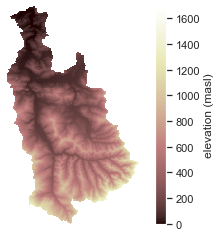

In [44]:
# visualize the DEM
im = plt.imshow(dem, cmap='pink')
cb = plt.colorbar(im)
cb.set_label('elevation (masl)')
plt.axis('off');

In [45]:
# minimum and maximum of the DEM
np.nanmin(dem), np.nanmax(dem)

(0.0, 1694.456)

#### Derive the hypsometric curve
To  derive the hypsometric curve we have to define elevation thresholds and calculate, for each of them, the ratio betweem the area below that threshold and the total area of the catchment. Since all cells have the same area, we will use the number of cells as a measure of area.

In [46]:
# define elevation thresholds
Zs = np.arange(start=0, stop=1701, step=100)
Zs

array([   0,  100,  200,  300,  400,  500,  600,  700,  800,  900, 1000,
       1100, 1200, 1300, 1400, 1500, 1600, 1700])

In [47]:
# total number of cells in the catchment
ncells = np.sum(~np.isnan(dem))
ncells

16265

__EXAMPLE: 100 m elevation threshold__

In [48]:
# set the threshold
Z = 100

In [49]:
# number of cells below 100 m elevation
n = np.sum(dem < Z)
n

C:\Anaconda3\envs\test\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in less
  


2049

In [50]:
# value in the hypsometric curve
n / ncells

0.1259760221334153

__Loop for all elevation thresholds__

In [51]:
# series where to save the data
hypso = pd.Series(index=Zs)

In [52]:
# compute the hypsometric curve
for Z in Zs:
    hypso[Z] = np.sum(dem < Z) / ncells
hypso

C:\Anaconda3\envs\test\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in less
  This is separate from the ipykernel package so we can avoid doing imports until


0       0.000000
100     0.125976
200     0.256871
300     0.370058
400     0.471073
500     0.579895
600     0.684291
700     0.783953
800     0.864125
900     0.917246
1000    0.951429
1100    0.973255
1200    0.987888
1300    0.994590
1400    0.998094
1500    0.999201
1600    0.999816
1700    1.000000
dtype: float64

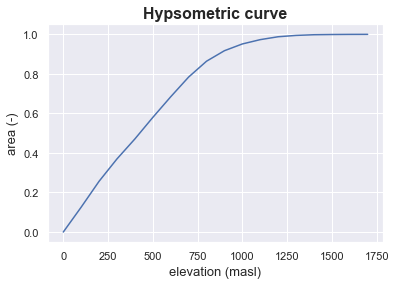

In [53]:
plt.plot(Zs, hypso)
plt.title('Hypsometric curve', fontsize=16, weight='bold')
plt.xlabel('elevation (masl)', fontsize=13)
plt.ylabel('area (-)', fontsize=13);

### Linear regressión precipitation-altitude
We will use the precipitation data to calculate the linear dependence of precipitation on altitude. This regression follows the equation:

$$P = m·Z+n$$

Where $P$ is mean annual precipitation (mm) at a point with altitude $Z$ (m.a.s.l), and $m$ and $n$ are, respectively, the slope and intercept of the regressed line.

#### Import data

In [61]:
# Import precipitation data
pcp_d = pd.read_csv('../data/daily_rainfall_Pas.csv', parse_dates=True, index_col=0)
pcp_d.tail()

,1115,1117B,1120,1122I,1127,1127U,1128,1129
fecha,,,,,,,,
2015-12-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-12-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-12-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-12-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [60]:
# import the attributes of the stations
stns = pd.read_csv('../data/stations_pas.csv', index_col='CODE')
stns

,NAME,PROVINCE,X,Y,Z
CODE,,,,,
1115,PUENTE ARCE,CANTABRIA,423820,4806679,13
1117B,VEGA DE PAS G C,CANTABRIA,436607,4778779,390
1120,SEL DE LA CARRERA,CANTABRIA,424623,4777667,537
1122I,ESCOBEDO DE VILLAFUFRE,CANTABRIA,426123,4790918,180
1127,SAN MARTIN DE VILLAFUFRE,CANTABRIA,428593,4789966,300
1127U,SANTA MARIA DE CAYON (G.C.),CANTABRIA,430454,4795500,100
1128,LA PENILLA,CANTABRIA,428436,4796446,140
1129,CASTAÑEDA,CANTABRIA,423030,4796506,121


#### Mean annual precipitation
From the daily precipitation series we must extrac a value of mean annual precipitation for each station. These are the values to use in the linear regression against the elevation.

__EXAMPLE: station 1115__

In [73]:
stn = '1115'

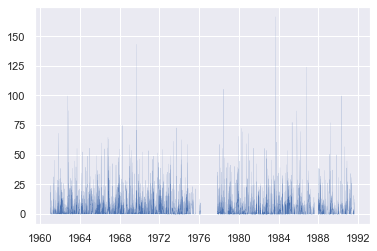

In [74]:
# visualize the data
plt.plot(pcp_d[stn], linewidth=.1);

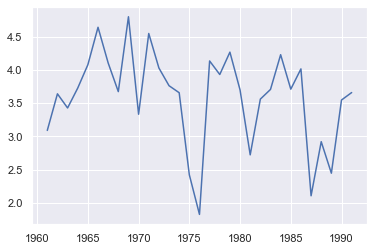

In [78]:
# annual series of mean precipitation
pcp_an = pcp_d[stn].groupby(pcp_d[stn].index.year).mean()
plt.plot(pcp_an);

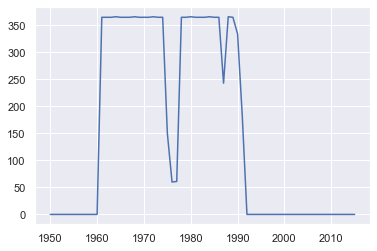

In [80]:
# number of days with data per year
daysYear = pcp_d[stn].groupby(pcp_d[stn].index.year).count()
plt.plot(daysYear);

In [ ]:
# set a threshold for the minimum number of days per year
thr = 330

In [82]:
# compute the mean annual precipitation for those years above the thresold
pcp_an.loc[daysYear > 330].mean() * 365

1364.828609175093

In [83]:
# what if we hadn't rejected years with poor data?
pcp_an.mean() * 365

1311.1996694259778

#### Loop for all the stations

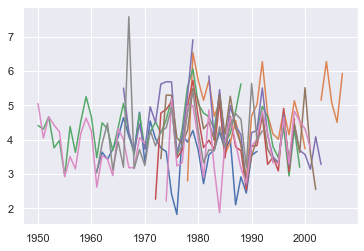

In [84]:
# annual series of mean precipitation
pcp_an = pcp_d.groupby(pcp_d.index.year).mean()
plt.plot(pcp_an);

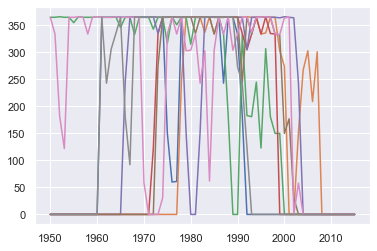

In [85]:
# number of days with data per year
daysYear = pcp_d.groupby(pcp_d.index.year).count()
plt.plot(daysYear);

In [89]:
# series where to save the mean annual precipitation
Pan = pd.Series(index=stns.index)

In [90]:
# compute mean annual precipitation
for stn in stns.index:
    Pan[stn] = pcp_an.loc[daysYear[stn] > 330, stn].mean() * 365
Pan

CODE
1115     1364.828609
1117B    1727.997346
1120     1591.733451
1122I    1490.998165
1127     1545.122189
1127U    1559.114413
1128     1416.518028
1129     1452.810887
dtype: float64

In [93]:
# add the mean annual precipitation to 'stns'
stns['Pan'] = Pan
stns

,NAME,PROVINCE,X,Y,Z,Pan
CODE,,,,,,
1115,PUENTE ARCE,CANTABRIA,423820,4806679,13,1364.828609
1117B,VEGA DE PAS G C,CANTABRIA,436607,4778779,390,1727.997346
1120,SEL DE LA CARRERA,CANTABRIA,424623,4777667,537,1591.733451
1122I,ESCOBEDO DE VILLAFUFRE,CANTABRIA,426123,4790918,180,1490.998165
1127,SAN MARTIN DE VILLAFUFRE,CANTABRIA,428593,4789966,300,1545.122189
1127U,SANTA MARIA DE CAYON (G.C.),CANTABRIA,430454,4795500,100,1559.114413
1128,LA PENILLA,CANTABRIA,428436,4796446,140,1416.518028
1129,CASTAÑEDA,CANTABRIA,423030,4796506,121,1452.810887


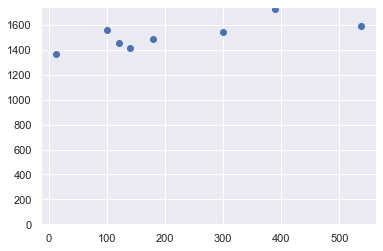

In [105]:
# visualize data
plt.scatter(stns.Z, stns.Pan)
plt.ylim(0);

#### Linear regression
We are using the function `linregress` in `scipy.stats` to perform the linear regressión between elevation ($Z$) and mean anual precipitation ($P_{an}$).

In [94]:
# import the function
from scipy.stats import linregress

In [95]:
# fit the linear regression
m, n, *perf = linregress(stns.Z, stns.Pan)
print('P = {0:.3f} Z + {1:.3f}'.format(m, n))

P = 0.492 Z + 1409.163


In [98]:
# check performance
print('R = {0:.3f}\np-value = {1:.3f}\nerror = {2:.3f}'.format(*perf))

R = 0.750
p-value = 0.032
error = 0.177


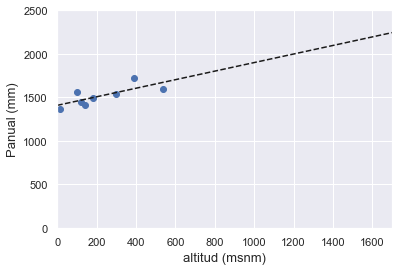

In [154]:
# plot the regression between elevation and annual precipitation
plt.scatter(stns.Z, stns.Pan)
# recta de regresión
xlim = np.array([Zs.min(), Zs.max()])
plt.plot(xlim, m * xlim + n, 'k--')
# configuración
plt.xlabel('altitud (msnm)', fontsize=13)
plt.xlim(xlim)
plt.ylabel('Panual (mm)', fontsize=13)
plt.ylim(0, 2500);

# guardar la figura
plt.savefig('../output/Ex4_linear regression Z-Pannual.png', dpi=300)

#### Areal precipitation
We will use the above linear regression to estimate the mean annual precipitation for each of the altitude bands. Areal precipitation is the weighted mean of these precipitation values, where the weights are the percentages of the catchment area belonging to the elevation bands.

In [117]:
# mean elevation for each band
Zs_ = np.mean((Zs[1:], Zs[:-1]), axis=0)

In [121]:
# data frame to calculate areal precipitation
pcp_areal = pd.DataFrame(index=Zs_)

In [125]:
# interpolate mean annual precipitation for each band
pcp_areal['Pan'] = m * Zs_ + n

In [143]:
# compute the weight
weights = []
for Z in Zs[1:]:
    weights.append(hypso[Z] - hypso[Z - 100])
pcp_areal['weight'] = weights

The areal precipitation is the summation of the product of weight (_A_, fraction of catchment area) by the interpolated precipitation (_P_). 

In [149]:
Pareal = np.sum(pcp_areal.Pan * pcp_areal.weight)

print('The mean annual precipitation in the catchment is {0:.1f} mm'.format(Pareal))

The mean annual precipitation in the catchment is 1632.5 mm


All the previous steps could be done in a shorter way:

In [150]:
p = np.polyfit(stns.Z,  stns.Pan, deg=1)      # fit the linear regression
Ps = np.polyval(p, pcp_areal.index)                   # interpolate precipitation
Pareal = np.sum(Ps * hypso.A)                 # areal precipitation

print('The mean annual precipitation in the catchment is {0:.1f} mm'.format(Pareal))

AttributeError: 'Series' object has no attribute 'Z'

If we had calculated the areal precipitation by the station-average method (see exercise 1), we would've underestimated the areal precipitation in the catchment.

In [151]:
Pareal2 = stns.Pan.mean()

print('The mean annual precipitation in the catchment is {0:.1f} mm'.format(Pareal2))

The mean annual precipitation in the catchment is 1518.6 mm
